<h2>Комп'ютерний практикум з обробки біомедичних даних</h2>
<h3>за темою: Дисперсійний аналіз </h3>
<h3>студентки групи БС-81</h3>
<h3>Кисельової Ірини</h3>

`Посилання на репозиторій github: https://github.com/Irines/MedImages/tree/master/Lab8 `

<h2>Теоретичні відомості</h2><p>
Дисперсійний аналіз - статистичний метод дослідження взаємозв'язку. Застосовується для аналізу впливу якісної змінної на одну залежну (кількісну) змінну. В основі дисперсійного аналізу лежить припущення, що одні змінні можливо розглядати як причини (незалежні змінні), інші - як наслідки (залежні змінні). Незалежні змінні в дисперсійному аналізі називають факторами. У зарубежній літературі дисперсійний аналіз часто обозначається як ANOVA, що переводиться як аналіз варіативності (Analysis of Variance).

Дисперсійний аналіз - параметричний метод.

<h2>Область застосування</h2><p>
ANOVA використовують для визначення статистичних відмінностей у середніх значення двох або більше групп.

<h2>Вимоги до даних</h2><p>
Ваші дані повинні відповідати наступним вимогам:

Залежна змінна має бути безперервною (кількісною).
Незалежна змінна має бути категоріальною (містити дві або більше груп).
Групи є незалежними.
Залежна змінна має нормальний розподіл.
Однорідність дисперсій. Групи мають приблизно однакові дисперсії.
Залежна змінна не містить викидів.
Кожна група має містити принаймні 6 спостережень.
Сбалансований дизайн. В ідеалі, групи мають бути однаковими за розміром.

<h2>Завдання</h2><p>
Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).
Побудувати графік розкиду в групах.
Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.
Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.
Перевірити результат роботи функції на реальних або сгенерованих даних. Зробити висновок.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

In [3]:
data = pd.read_csv('vehicle_price.csv')
data

,brand,model,year,body,price$,car_mileage,fuel,power,transmission
0,ford,transit,2006,other,5 350,220,diesel,2.0,manual
1,renault,master,2017,other,17 000,211,diesel,2.3,manual
2,opel,vivaro,2015,other,15 200,157,diesel,1.6,manual
3,ford,transit,2000,other,4 999,300,diesel,2.4,manual
4,mercedes-benz,sprinter,2010,other,20 700,682,diesel,3.0,automatic
...,...,...,...,...,...,...,...,...,...
22862,skoda,octavia,2005,liftback,6 500,200,petrol,1.4,manual
22863,skoda,octavia,2011,liftback,9 300,109,petrol,1.8,manual
22864,porsche,panamera,2017,liftback,105 000,8,NaN,2.9,automatic
22865,skoda,octavia,2011,liftback,9 300,140,gas,1.8,manual


In [5]:
brands = data['brand'].tolist()
ctr = Counter(brands)
ctr.most_common()

[('volkswagen', 2851),
 ('renault', 1579),
 ('mercedes-benz', 1518),
 ('bmw', 1285),
 ('skoda', 1234),
 ('ford', 1230),
 ('toyota', 1179),
 ('opel', 1062),
 ('hyundai', 984),
 ('nissan', 910),
 ('audi', 890),
 ('ваз', 704),
 ('chevrolet', 675),
 ('kia', 600),
 ('mitsubishi', 593),
 ('mazda', 579),
 ('peugeot', 578),
 ('honda', 461),
 ('citroen', 424),
 ('lexus', 337),
 ('daewoo', 319),
 ('fiat', 252),
 ('subaru', 239),
 ('dacia', 198),
 ('land', 184),
 ('заз', 163),
 ('volvo', 158),
 ('porsche', 155),
 ('infiniti', 133),
 ('seat', 127),
 ('suzuki', 122),
 ('tesla', 118),
 ('jeep', 109),
 ('geely', 84),
 ('ssangyong', 75),
 ('chery', 69),
 ('mini', 65),
 ('acura', 60),
 ('dodge', 58),
 ('газ', 54),
 ('chrysler', 51),
 ('jaguar', 47),
 ('smart', 33),
 ('bentley', 33),
 ('cadillac', 29),
 ('уаз', 24),
 ('great', 18),
 ('daihatsu', 17),
 ('maserati', 16),
 ('lincoln', 15),
 ('buick', 14),
 ('ravon', 12),
 ('alfa', 11),
 ('rover', 10),
 ('hummer', 10),
 ('byd', 8),
 ('lada', 7),
 ('богдан',

In [6]:
# Обрати потрібні бренди
required_data = data.loc[data['brand'].isin(['volkswagen', 'ford', 'mitsubishi'])][['brand', 'price$']]

required_data = required_data.set_index('brand')

# убрати спейси
required_data['price$'] = required_data['price$'].str.replace(' ', '')

# конверт у числовий формат
required_data['price$'] = pd.to_numeric(required_data['price$'])

required_data = required_data.loc[required_data['price$'] > 1000]
required_data

,price$
brand,
ford,5350
ford,4999
volkswagen,12900
volkswagen,7300
volkswagen,18300
...,...
ford,2500
ford,6500
ford,8700


In [7]:
# Отримати списки цін для кожної марки

volkswagen_data = required_data.loc['volkswagen']['price$'].tolist()
ford_data = required_data.loc['ford']['price$'].tolist()
mitsubishi_data = required_data.loc['mitsubishi']['price$'].tolist()

sorted_data = [sorted(volkswagen_data), sorted(ford_data), sorted(mitsubishi_data)]

volkswagen_data = [x/1000 for x in volkswagen_data if x < sorted_data[0][int(len(sorted_data[0])*0.9)]]
ford_data = [x/1000 for x in ford_data if x < sorted_data[0][int(len(sorted_data[0])*0.9)]]
mitsubishi_data = [x/1000 for x in mitsubishi_data if x < sorted_data[0][int(len(sorted_data[0])*0.9)]]

# Отримати мінімальну кількість серед марок

n = len(min(volkswagen_data, ford_data, mitsubishi_data, key=len))

volkswagen_data = volkswagen_data[:n]
ford_data = ford_data[:n]
mitsubishi_data = mitsubishi_data[:n]

df = pd.DataFrame([volkswagen_data, ford_data, mitsubishi_data],
                 index = ['volkswagen', 'ford', 'mitsubishi']).transpose()

df

,volkswagen,ford,mitsubishi
0,12.9,5.350,1.880
1,7.3,4.999,11.900
2,18.3,14.900,7.500
3,10.5,18.399,5.400
4,8.2,5.800,9.777
...,...,...,...
544,3.7,6.900,14.000
545,11.8,4.500,4.950
546,6.1,6.700,2.100
547,11.7,6.400,5.200


In [8]:
# Попередня обробка даних

df
df_stats = pd.DataFrame([[np.mean(volkswagen_data), np.mean(ford_data), np.mean(mitsubishi_data)],
                        [np.sum(volkswagen_data), np.sum(ford_data), np.sum(mitsubishi_data)]],
                       columns = df.columns,
                       index = ['mean', 'sum'])

pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.append(df_stats)

,volkswagen,ford,mitsubishi
0,12.900,5.350,1.880
1,7.300,4.999,11.900
2,18.300,14.900,7.500
3,10.500,18.399,5.400
4,8.200,5.800,9.777
...,...,...,...
546,6.100,6.700,2.100
547,11.700,6.400,5.200
548,12.900,5.950,7.650
mean,10.296,9.645,9.826


<h2>Статистичні характеристики та графік розподілу</h2><p>

In [9]:
df_std = pd.DataFrame([[np.std(volkswagen_data), np.std(ford_data), np.std(mitsubishi_data)]],
                     columns = df_stats.columns.tolist(), index=['std'])

df_stats = df_stats.append(df_std)
df_stats.drop(['sum'], axis=0)

,volkswagen,ford,mitsubishi
mean,10.296,9.645,9.826
std,3.891,3.767,4.135


[Text(0.5, 0, 'Price, 1000$')]

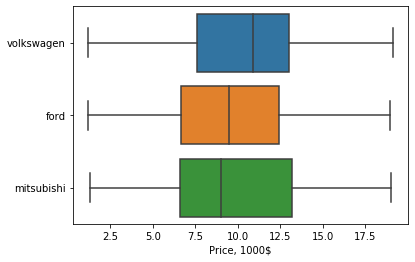

In [11]:
sns.boxplot(data=df, orient='h').set(xlabel='Price, 1000$')

In [13]:
#Дисперсійний аналіз

from functools import reduce

def anova(groups):
    all_values = reduce(lambda group1, group2: group1+group2, groups)
    
    Tc = [sum([x for x in group]) for group in groups]
    sum_of_squared_Tc = sum([x**2 for x in Tc])
    c = len(groups)
    n = len(groups[0])
    N = sum([len(group) for group in groups])
    squared_sum_of_xi = sum(all_values)**2
    squared_sum_of_xi_divide_N = squared_sum_of_xi / N
    sum_of_squared_xi = sum([x**2 for x in all_values])
    
    SS_fact = sum_of_squared_Tc / n - squared_sum_of_xi / N
    SS_overall = sum_of_squared_xi - squared_sum_of_xi / N
    SS_rest = SS_overall - SS_fact
    
    d_fact = c - 1
    d_overall = N - 1
    d_rest = d_overall - d_fact
    
    MS_fact = SS_fact / d_fact
    MS_rest = SS_rest / d_rest
    
    F_exp = MS_fact / MS_rest
    
    fisher_critical = pd.read_excel('fisher.xlsx',index_col=0, skiprows=1, skipfooter=9, index=False)
    
    f1_list = fisher_critical.columns.tolist()
    f2_list = fisher_critical.index.tolist()
    
    try:
        f1 = f1_list[f1_list.index(d_fact)]
    except ValueError:
        if d_rest > 34:
            f1 = '>40'
        else:
            array = np.asarray(f2_fact[:-1])
            idx = (np.abs(array - d_fact)).argmin()
            f1 = array[idx]
    
    try:
        f2 = f2_list[f2_list.index(d_rest)]
    except ValueError:
        if d_rest > 124:
            f2 = '>130'
        else:
            array = np.asarray(f2_list[:-1])
            idx = (np.abs(array - d_rest)).argmin()
            f2 = array[idx]
    
    F_crit = fisher_critical.loc[f2, f1]
    
    steps = pd.DataFrame([SS_fact, SS_overall, SS_rest, d_fact, d_overall, d_rest, MS_fact, MS_rest, F_exp, F_crit],
                     columns = ['value'],
                     index = ['$SS_{факт}$', '$SS_{заг}$', '$SS_{вип}$', '$d_{факт}$', '$d_{заг}$',
                              '$d_{вип}$', '$MS_{факт}$', '$MS_{вип}$', '$F_{емп}$', '$F_{крит}$'])
    
    return steps

# Get the data as list of lists
groups = df[df.columns].transpose().to_numpy().tolist()

anova(groups)

,value
$SS_{факт}$,123.982
$SS_{заг}$,25614.195
$SS_{вип}$,25490.213
$d_{факт}$,2.000
$d_{заг}$,1646.000
$d_{вип}$,1644.000
$MS_{факт}$,61.991
$MS_{вип}$,15.505
$F_{емп}$,3.998
$F_{крит}$,3.000


<h2>Висновок</h2><p>
Під час дисперсійного аналізу було отримано результат, який дозволяє відхилити нульову гіпотезу про рівність середніх та прийняти альтернативну гіпотезу про їхню відмінність, оскільки розрахований критерій Фішера виявився більший за критичний для відповідних ступеней свободи.